In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action='ignore')

## Central Limit Theorem ##

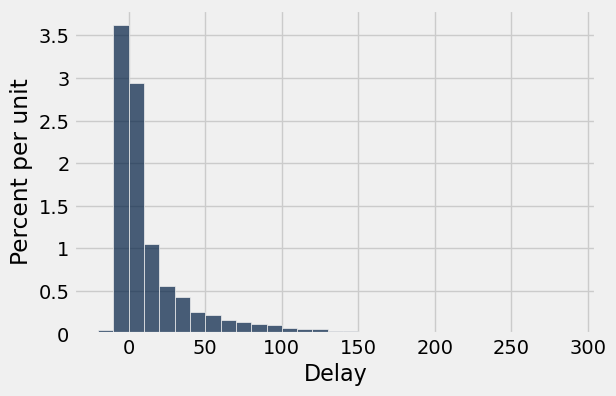

In [2]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)

In [3]:
delays = united.column('Delay')
population_mean = np.mean(delays)
population_sd = np.std(delays)
population_mean, population_sd

(16.658155515370705, 39.480199851609314)

In [4]:
percentile(50, delays)

2

In [5]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [6]:
def ten_thousand_sample_means(sample_size):
    """Approximate the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [7]:
sample_means_100 = ten_thousand_sample_means(100)
sample_means_100

array([ 10.14,  10.06,  23.27, ...,  16.65,  13.16,  13.3 ])

Population Average: 16.6581555154


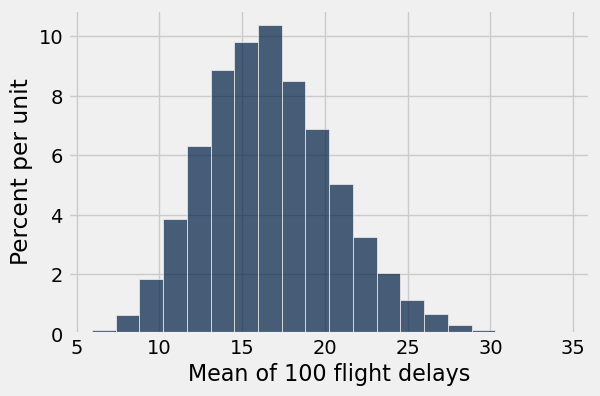

In [8]:
Table().with_column(
    'Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', population_mean)

Population Average: 16.6581555154


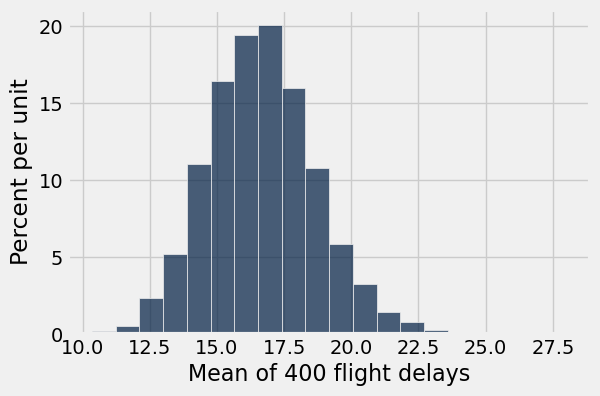

In [9]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)
print('Population Average:', population_mean)

In [10]:
sample_means_900 = ten_thousand_sample_means(900)

In [11]:
means_tbl = Table().with_columns(
    '100', sample_means_100,
    '400', sample_means_400,
    '900', sample_means_900,
)

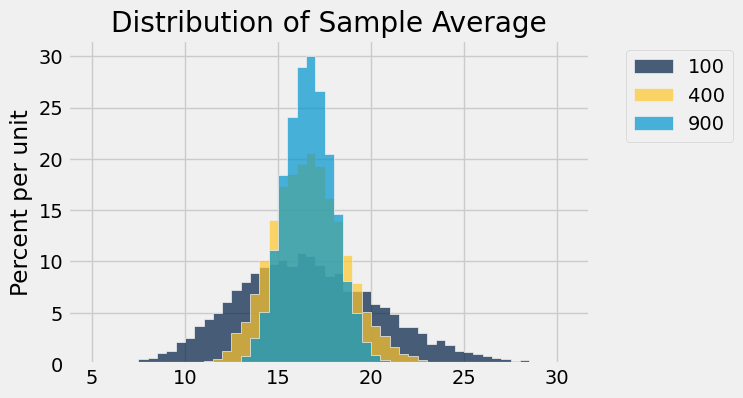

In [12]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

### Relationship Between Population SD and Sample Size

In [13]:
"""Empirical distribution of random sample means"""
def plot_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", population_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("Population SD:", population_sd)
    print("SD of sample means:", np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

Sample size:  100
Population mean: 16.6581555154
Average of sample means:  16.642078
Population SD: 39.4801998516
SD of sample means: 3.96026869315


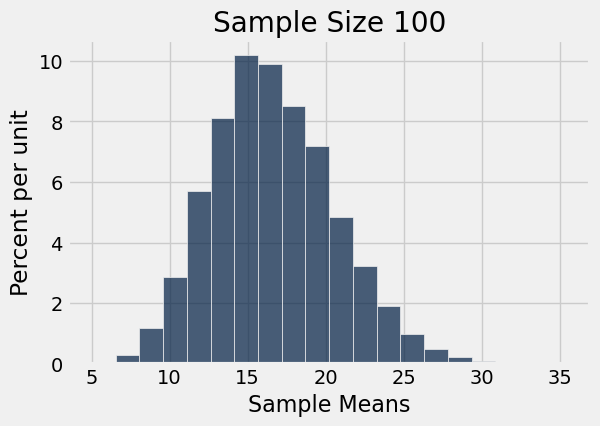

In [14]:
plot_sample_means(100)

In [15]:
39.48 / 3.93

10.045801526717556

Sample size:  400
Population mean: 16.6581555154
Average of sample means:  16.6973795
Population SD: 39.4801998516
SD of sample means: 1.98597052609


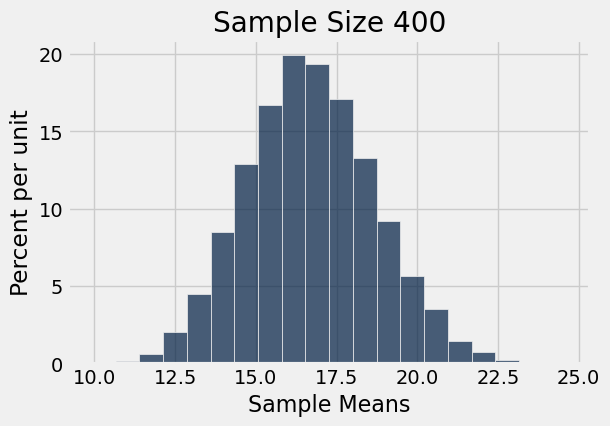

In [16]:
plot_sample_means(400)

In [17]:
39.48 / 1.974

20.0

Sample size:  625
Population mean: 16.6581555154
Average of sample means:  16.65489104
Population SD: 39.4801998516
SD of sample means: 1.58190985599


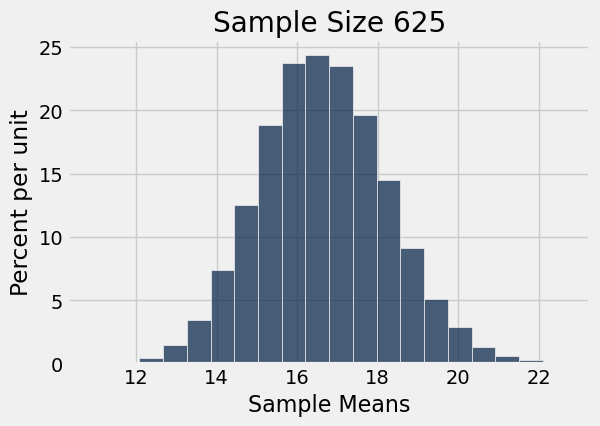

In [18]:
plot_sample_means(625)

In [19]:
39.48 / 1.59

24.83018867924528

In [20]:
39.48 / np.sqrt(100)

3.9479999999999995

In [21]:
39.48 / np.sqrt(400)

1.9739999999999998

In [22]:
39.48 / np.sqrt(625)

1.5791999999999999

## Variability of the Sample Mean

In [23]:
# Warning: this cell will take a long time to run!
sample_sizes = np.arange(100, 950, 50)

sample_mean_sds = make_array()
for n in sample_sizes:
    sample_means = ten_thousand_sample_means(n)
    sample_mean_sds = np.append(sample_mean_sds, np.std(sample_means))

In [24]:
sd_table = Table().with_columns(
    'Sample size', sample_sizes,
    'SD of simulated sample means', sample_mean_sds,
    'Pop SD / sqrt(sample size)', population_sd / np.sqrt(sample_sizes),
)
sd_table

Sample size,SD of simulated sample means,Pop SD / sqrt(sample size)
100,3.9583,3.94802
150,3.2265,3.22354
200,2.80258,2.79167
250,2.51213,2.49695
300,2.23707,2.27939
350,2.09938,2.11031
400,1.9777,1.97401
450,1.85099,1.86111
500,1.75813,1.76561
550,1.69447,1.68344


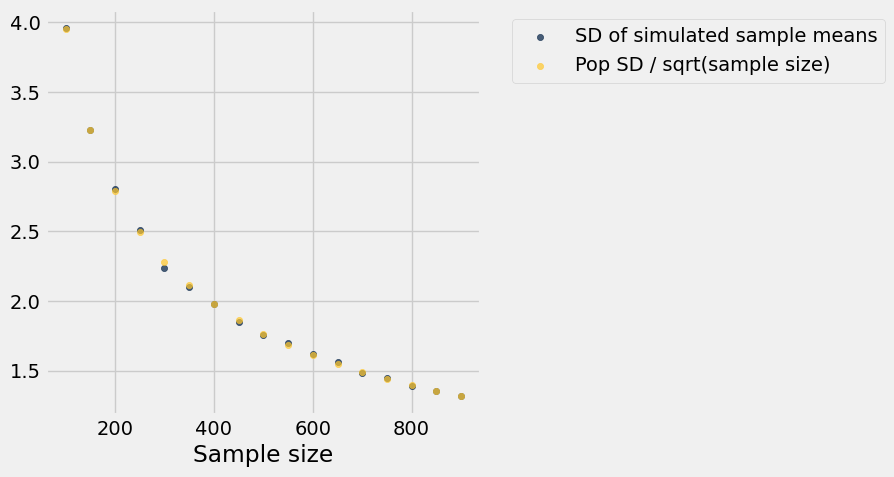

In [25]:
sd_table.scatter('Sample size')